# Plots

Generating plots for presentation at the Society for the Neurobiology of Language Annual Meeting, 2023

## Imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.patches as patches
%matplotlib inline
from scipy.stats import pearsonr, zscore, multivariate_normal
from itertools import repeat, chain
from brainiak.eventseg.event import EventSegment
from nilearn import datasets
from nilearn.plotting import plot_connectome, plot_surf_roi, show

## Random matrices

In [ ]:
for i in range(5):
    X = np.random.uniform(0, 5, size=(10, 10))
    np.fill_diagonal(X, 0)
    plt.imshow(X)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"matrix{i}.png", dpi=300)

## Simple example of windowed dynamic connectivity

Create timeseries

In [3]:
timpts= 100
voxels = 3
timeseries = np.zeros((voxels, timpts))


for i in range(voxels):
    # random activity
    vals = np.random.uniform(-1, 1, timpts)

    timeseries[i, :] = vals

# embed ground truth
gt = 0.2 # set ground truth
cov_matrix = np.array([[1, gt], [gt, 1]]) # create covariance matrix
d = np.random.multivariate_normal([0, 0], cov_matrix, timpts).T # add in desired ground truth

# append to timeseries
timeseries[0, :] = d[0]
timeseries[2, :] = d[1]

# print correlation
v1 = timeseries[0,:]
v3 = timeseries[2,:]
r = np.corrcoef(v1, v3)[0, 1]

print(f'The emperical correlation is %.2f' % r)

The emperical correlation is 0.23


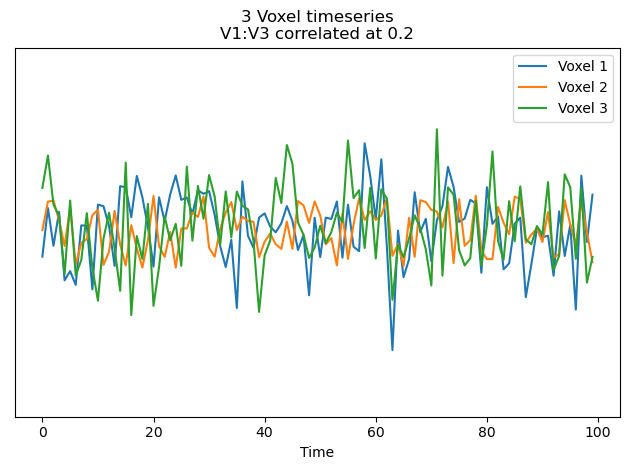

In [39]:
for i in range(voxels):
    plt.plot(timeseries[i, :])

plt.ylim(-5, 5)
plt.yticks([])

plt.title('3 Voxel timeseries\nV1:V3 correlated at 0.2')
plt.legend(['Voxel 1', 'Voxel 2', 'Voxel 3'])
plt.xlabel('Time')
plt.tight_layout()

plt.savefig('timeseries.png', dpi=300)

Calculate correlations

In [4]:
t = 100
k = 25

# empty object to store correlation matrices for later
corr_obj = []

for l in range(0, t-k+1, 1):
    end = l+k
    window = timeseries[:, l:end]

    # get pearson R for each voxel
    corrs = np.zeros((voxels, voxels))
    for i in range(voxels):
        for j in range(voxels):
            r, _ = pearsonr(window[i], window[j])
            corrs[i, j] = r

    corr_obj.append(corrs)

Plot timeseris and some correlations together

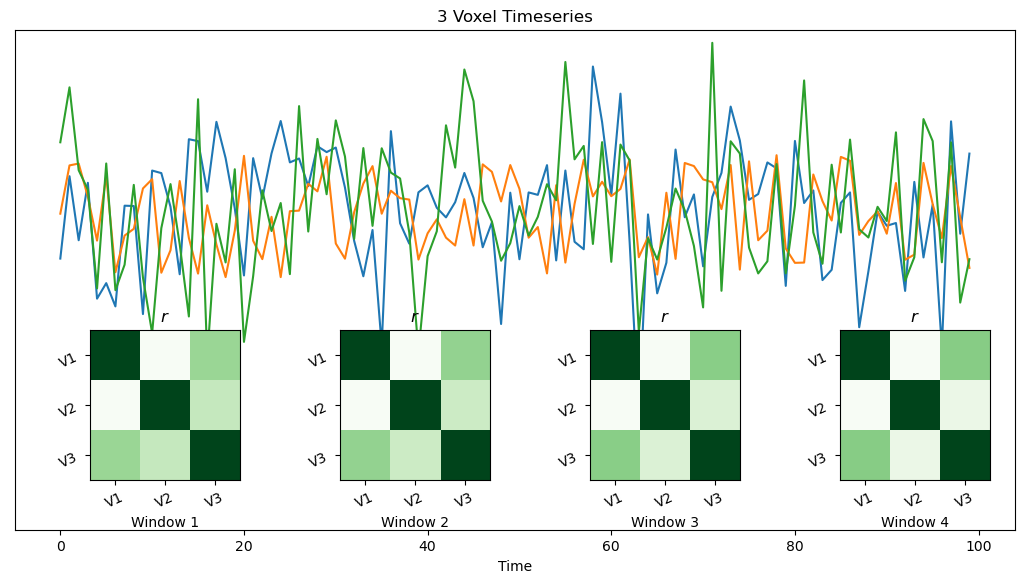

In [44]:
# create figure and axes
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

#set labels and other stuff
axes.set_xlabel('Time')
axes.set_yticks([])
axes.set_title('3 Voxel Timeseries')
axes.set_ylim(-5, 3)

# plot timeseries
for i in range(voxels):
    axes.plot(timeseries[i, :]);

titles = ['Window 1', 'Window 2', 'Window 3', 'Window 4']
x_pos = [0, 0.25, 0.5, 0.75]

# add windows
for i in range(4):
    axes2 = fig.add_axes([x_pos[i], 0.1, 0.3, 0.3])
    axes2.imshow(corr_obj[i], cmap='Greens')
    axes2.set_yticks([0, 1, 2]) 
    axes2.set_yticklabels(['V1', 'V2', 'V3'], rotation=25)
    axes2.set_xticks([0, 1, 2])
    axes2.set_xticklabels(['V1', 'V2', 'V3'], rotation=25)
    axes2.set_xlabel(titles[i])
    axes2.set_title(f'$r$')

# save
# fig.savefig('windows.png', dpi=300, bbox_inches='tight')

Plotting correlations

In [45]:
v1_v1 = []
v1_v3 = []
v1_v2 = []
v2_v3 = []

for i in range(len(corr_obj)):
    v1_v1.append(corr_obj[i][0][0])
    v1_v3.append(corr_obj[i][0][2])
    v1_v2.append(corr_obj[i][0][1])
    v2_v3.append(corr_obj[i][1][2])


Plot

/Users/lendlab/opt/anaconda3/envs/brainiak_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


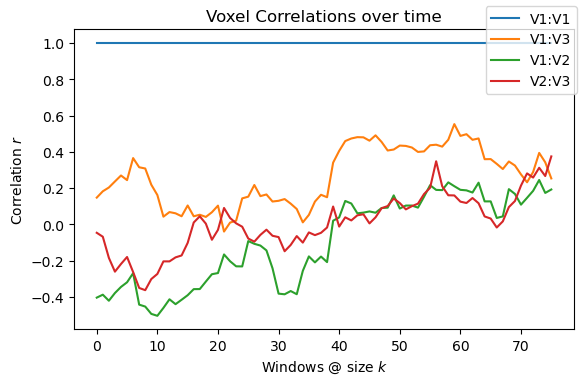

In [46]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(v1_v1, label='V1:V1')
ax.plot(v1_v3, label='V1:V3')
ax.plot(v1_v2, label='V1:V2')
ax.plot(v2_v3, label='V2:V3')

fig.legend()

ax.set_title('Voxel Correlations over time')
ax.set_ylabel(f'Correlation $r$')
ax.set_xlabel(f'Windows @ size $k$')

fig.show()

Plotting correlations based on different window size

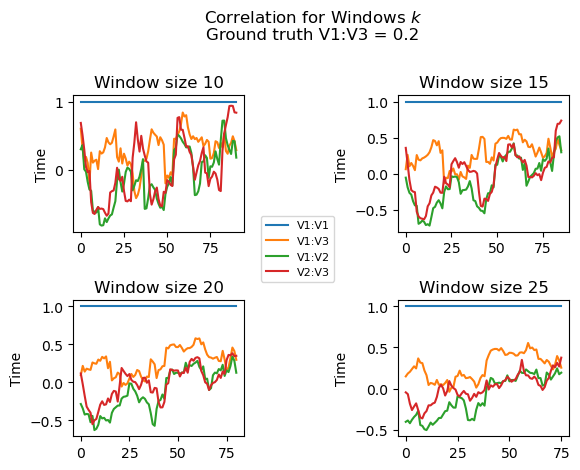

In [68]:
t = 100
k = [10, 15, 20, 25]
fig, ax = plt.subplots(ncols=2, nrows=2)


for w in k:
    # empty object to store correlation matrices for later
    corr_obj = []
    for l in range(0, t-w+1, 1):
        end = l+w
        window = timeseries[:, l:end]

        # get pearson R for each voxel
        corrs = np.zeros((voxels, voxels))
        for i in range(voxels):
            for j in range(voxels):
                r, _ = pearsonr(window[i], window[j])
                corrs[i, j] = r

        corr_obj.append(corrs)


    # append correlations to some objects
    v1_v1 = []
    v1_v3 = []
    v1_v2 = []
    v2_v3 = []
    for i in range(len(corr_obj)):
        v1_v1.append(corr_obj[i][0][0])
        v1_v3.append(corr_obj[i][0][2])
        v1_v2.append(corr_obj[i][0][1])
        v2_v3.append(corr_obj[i][1][2])

    # Grabbing k for the plot
    ax_row = (k.index(w)) // 2
    ax_col = (k.index(w)) % 2

    # plotting
    ax[ax_row, ax_col].plot(v1_v1, label='V1:V1')
    ax[ax_row, ax_col].plot(v1_v3, label='V1:V3')
    ax[ax_row, ax_col].plot(v1_v2, label='V1:V2')
    ax[ax_row, ax_col].plot(v2_v3, label='V2:V3')


# Add labels and legend
for i in range(2):
    for j in range(2):
        ax[i, j].title.set_text(f'Window size {k[i*2 +j] }')
        ax[i, j].set_ylabel('Correlation')
        ax[i, j].set_ylabel('Time')


# add some more things to plot
fig.subplots_adjust(hspace=0.5, wspace=0.9,top=.8, bottom=0.09)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.45, 0.40), fontsize=8)

fig.suptitle(f'Correlation for Windows $k$\nGround truth V1:V3 = 0.2')

fig.savefig('corrswindsize.png', dpi=300)

## Estimating window length

Function for swc

In [5]:
# import numpy as np

def swc_loop(x, y, z, delta, TR):
    h = 2 * delta * TR
    r = np.zeros((len(x)))

    for n in range(delta, (len(x) - delta)):
        a = n - delta
        b = n + delta
        r[n] = (TR / h) * np.sum((x[a:b] * y[a:b]) - (np.mean(x[a:b]) * np.mean(y[a:b]) * np.mean(z[a:b])))

    return r, float(h)

some variables we will need

In [6]:
nt = 100
k = np.arange(nt)
TR = 1.0
r = np.zeros((60, nt))
h = np.zeros((60, 1))
# x = np.cos(w * k * TR)
# x = x / np.std(x)
# y = np.cos(w * k * TR  + theta)
# y = y / np.std(y)

x = timeseries[0, :]
x = x/np.std(x)
y = timeseries[1, :]
y = y/np.std(y)
z = timeseries[2, :]
z = z/np.std(z)

executing the swc function

In [7]:
for delta in range(1, 61):
    r[delta-1, :], h[delta-1] = swc_loop(x.flatten(), y.flatten(), z.flatten(), delta, TR)

h = np.tile(h, (1, nt))
z = r != 0

plot

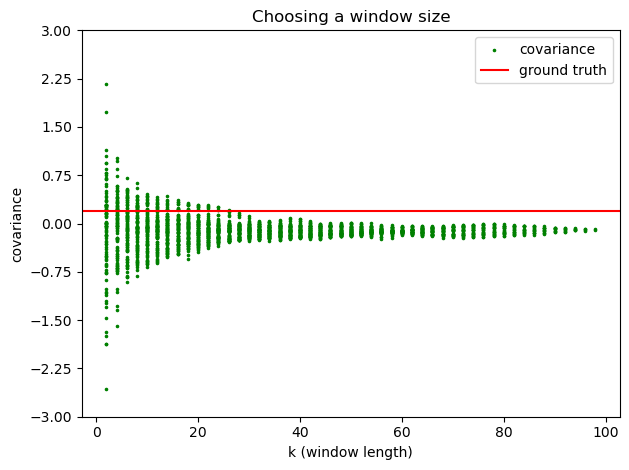

In [25]:
plt.scatter(h[z], r[z], s=10, color='green',marker='.', label='covariance')
plt.axhline(y=0.2, color='red', label='ground truth')
plt.xlabel('k (window length)')
plt.ylabel('covariance')
plt.yticks(np.linspace(-3, 3, 9))
# plt.yticks([])
plt.legend()
plt.title('Choosing a window size')
plt.tight_layout()
plt.savefig("covariance.png", dpi = 300)

## Hidden markov model

See my in-progress repo [here](https://github.com/w-decker/hmm-fmri). Where I am playing around with the HMM a little more.

Function for generating simple timeseries with obvious events

In [3]:
def sim_data(n_events, noise, n_voxels, plot=False, skew=False):

    labels=[]
    if skew is False:
        for i in range(n_events):
            x = list(repeat(i, 5))
            labels.append(x)
    elif skew is True:
        _l = np.arange(0, n_events)
        x = list(repeat(_l[0], 10))
        labels.append(x)
        for i in range(1, n_events):
            x = list(repeat(i, 5))
            labels.append(x)

    labels = list(chain.from_iterable(labels))
    
    event_blocks = n_events + 1
    pattern = np.random.rand(event_blocks, n_voxels)
    data = np.zeros((len(labels), n_voxels))
    for i in range(len(labels)):
        data[i, :] = pattern[labels[i], :] +\
            noise * np.random.rand(n_voxels)

    if plot == True:
        plt.imshow(zscore(data.T), origin='lower')
        plt.xlabel('Time')
        plt.ylabel('Voxels')
        plt.title('Simulated data with events')
        plt.xticks(np.arange(0, data.shape[0], 5))
        boundaries = np.where(np.diff(labels))[0] + 0.5
        for boundary in boundaries:
            plt.axvline(boundary, 0, 1, color='red')

        plt.legend(handles=[plt.Line2D([0], [0], color='red', label='boundary')])
        plt.tight_layout()

    return data, labels

Making the data

In [4]:
X, labels = sim_data(4, noise=0.1, n_voxels=10, plot=False)

Plotting

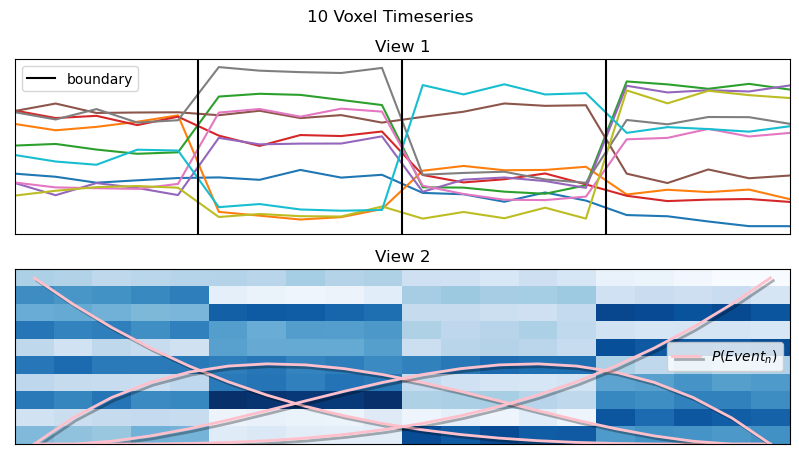

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax[0].plot(X)
ax[0].set_title('View 1')
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xlim((0, 19))
boundaries = np.where(np.diff(labels))[0] + 0.5
for boundary in boundaries:
    ax[0].axvline(boundary, 0, 1, color='k')
ax[0].legend(handles=[plt.Line2D([0], [0], color='k', label='boundary')])

ax[1].imshow(X.T, aspect='auto', cmap='Blues')
ax[1].set_title('View 2')
ax[1].set_yticks([])
ax[1].set_xticks([])

es_prior = EventSegment(4)
prior = es_prior.model_prior(len(labels))[0]
ax[1].plot(9.5 - 9.5 * (prior / np.max(prior)), color='pink', lw=2, path_effects=[pe.SimpleLineShadow(shadow_color='k'), pe.Normal()])
ax[1].legend(handles=[plt.Line2D([0], [0], color='pink', label=f'$P(Event_n)$', lw=2, path_effects=[pe.SimpleLineShadow(shadow_color='k'), pe.Normal()])])


fig.suptitle('10 Voxel Timeseries')

#save figure
fig.savefig('hmmsim.png', dpi=300, bbox_inches='tight')


Fit the model

In [6]:
es = EventSegment(4, n_iter=500)
es.fit(X)

EventSegment(event_chains=array([0., 0., 0., 0.]), n_events=4, n_iter=500,
             split_merge=False, split_merge_proposals=1,
             step_var=<function EventSegment._default_var_schedule at 0x7fe891a51cb0>)

plot

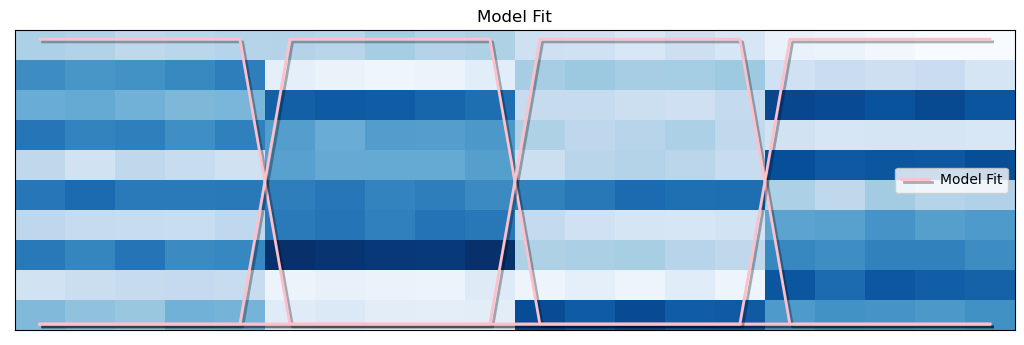

In [13]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.imshow(X.T, aspect='auto', cmap='Blues')
ax.set_title('Model Fit')
ax.set_yticks([])
ax.set_xticks([])

ax.plot(9.3 - 9.5 * (es.segments_[0] / np.max(es.segments_[0])), color='pink', lw=2, path_effects=[pe.SimpleLineShadow(shadow_color='k'), pe.Normal()])
ax.legend(handles=[plt.Line2D([0], [0], color='pink', label=f'Model Fit', lw=2, path_effects=[pe.SimpleLineShadow(shadow_color='k'), pe.Normal()])], loc=7)

#save figure
fig.savefig('hmmsim_fit.png', dpi=300, bbox_inches='tight')

Show where the events are segmented in time

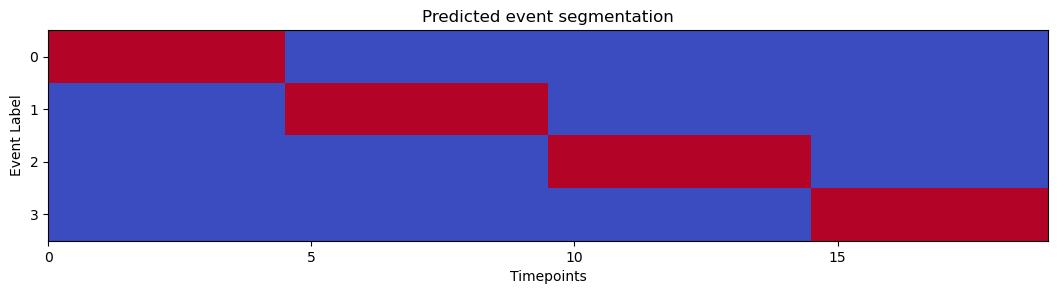

In [31]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
segs = es.segments_[0]

ax.imshow(segs.T, cmap='coolwarm')
ax.set_title('Predicted event segmentation')
ax.set_ylabel('Event Label')
ax.set_xticks(np.linspace(0, 20, 5))
ax.set_xlim(0, 19)
ax.set_xlabel('Timepoints')

fig.savefig('segments.png', dpi=300, bbox_inches='tight')


## Plotting brain connections at nodes in MNI space

This is using `nilearn.plotting.plot_connectome()`

Prediction process.

Here, I am plotting connections between regions of the cerebellum and the IFG. There is a functional link between cerebellum and IFG and it is thought that the cerebellum operates as a predictive machine in the brain.

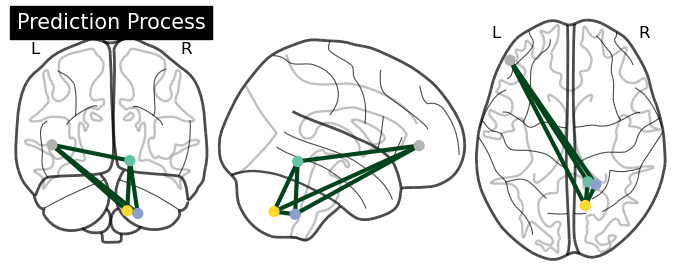

In [45]:
coord1 = np.array([[14, -48, -10], [20, -50, -50], [12, -66, -48], [-45,44,2]])
x = np.ones((4, 4))
fig = plot_connectome(x, coord1, title='Prediction Process', edge_cmap='Greens')
fig.savefig('pred.png', dpi=300)

Encoding process

Here, I am plotting functional links btween the SPL and regions of the DMN. These regions are thought to be responsible for WM processes.

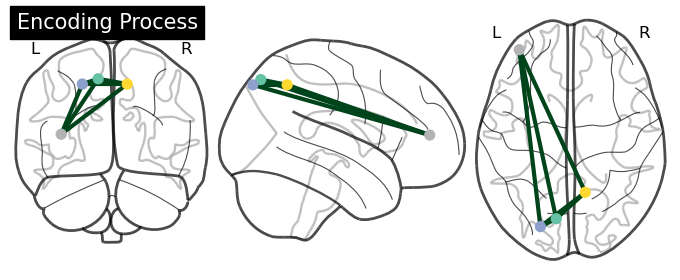

In [54]:
coords = np.array([[-10, -76,52], [-22, -82, 48], [12, -56, 48], [-38, 52, 10]])
x = np.ones((len(coords), len(coords)))
fig = plot_connectome(x, coords, title='Encoding Process', edge_cmap='Greens')
fig.savefig('encod.png', dpi=300)

Detection Process

Here, I am plotting functional linkes between regions invovled in auditory perception, like the IFG and STG. 

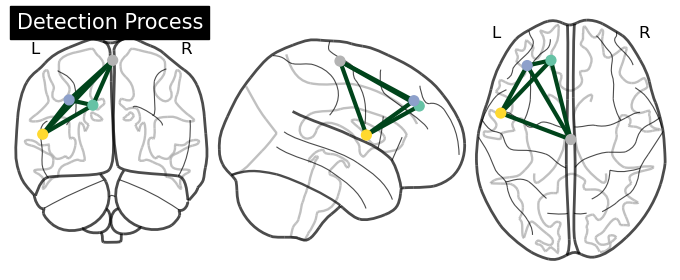

In [58]:
coords = np.array([[-14, 44, 32], [-32, 40, 36], [-52, 4, 10], [1, -16, 66]])
x = np.ones((len(coords), len(coords)))
fig = plot_connectome(x, coords, title='Detection Process', edge_cmap='Greens')
fig.savefig('detect.png', dpi=300)

## Plotting expected HMM with longer data for **_Expected Results_**

some functions from BrainIAK tutorial to generate longer data

In [185]:

def generate_event_labels(T, K, length_std):
    event_labels = np.zeros(T, dtype=int)
    start_TR = 0
    for e in range(K - 1):
        length = round(
            ((T - start_TR) / (K - e)) * (1 + length_std * np.random.randn()))
        length = min(max(length, 1), T - start_TR - (K - e))
        event_labels[start_TR:(start_TR + length)] = e
        start_TR = start_TR + length
    event_labels[start_TR:] = K - 1

    return event_labels


def generate_data(V, T, event_labels, event_means, noise_std):
    simul_data = np.empty((V, T))
    for t in range(T):
        simul_data[:, t] = multivariate_normal.rvs(
            event_means[:, event_labels[t]], cov=noise_std, size=1)

    simul_data = zscore(simul_data, axis=1, ddof=1)
    return simul_data

def plot_tt_similarity_matrix(ax, data_matrix, bounds, n_TRs, title_text):
    ax.imshow(np.corrcoef(data_matrix.T), cmap='viridis')
    ax.set_title(title_text)
    ax.set_xlabel('TR')
    ax.set_ylabel('TR')
    # plot the boundaries 
    bounds_aug = np.concatenate(([0],bounds,[n_TRs]))
    for i in range(len(bounds_aug)-1):
        rect = patches.Rectangle(
            (bounds_aug[i],bounds_aug[i]),
            bounds_aug[i+1]-bounds_aug[i],
            bounds_aug[i+1]-bounds_aug[i],
            linewidth=2,edgecolor='w',facecolor='none'
        )
        ax.add_patch(rect)

Create the data

In [180]:
# Parameters for creating small simulated datasets
V = 100 # number of voxels
K = 3 # number of events
T = 500 # Time points

# Generate the first dataset
np.random.seed(1)
event_means = np.random.randn(V, K)
event_labels = generate_event_labels(T, K, 0.2)
D = generate_data(V, T, event_labels, event_means, 1/4)

Find events

In [181]:
hmm_sim = EventSegment(K)
hmm_sim.fit(D.T)

EventSegment(event_chains=array([0., 0., 0.]), n_events=3, n_iter=500,
             split_merge=False, split_merge_proposals=1,
             step_var=<function EventSegment._default_var_schedule at 0x7f8ac3461cb0>)

Plot predicted events

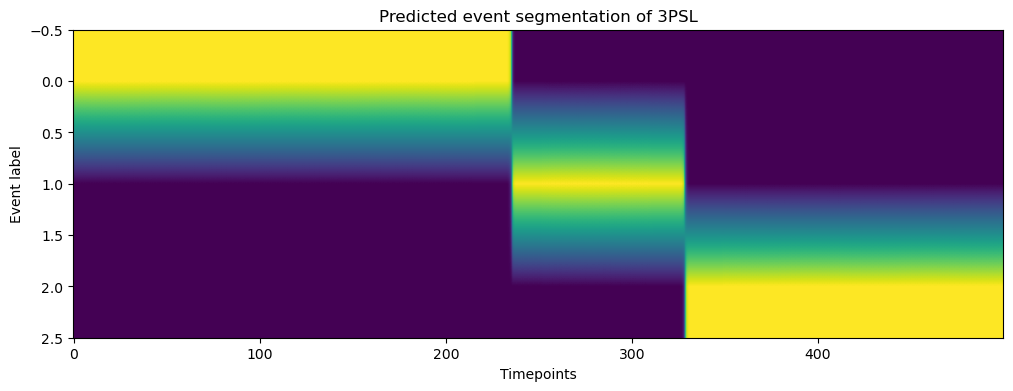

In [196]:
f, ax = plt.subplots(1,1, figsize=(12,4))

pred_seg = hmm_sim.segments_[0]
ax.imshow(pred_seg.T, aspect='auto', cmap='viridis', interpolation='bilinear') # add interp param to save gradients to plot
ax.set_xlabel('Timepoints')
ax.set_ylabel('Event label')
ax.set_title('Predicted event segmentation of 3PSL')
plt.rcParams["image.composite_image"] =False
f.savefig('3pslhmm.png', dpi=300)

Extract boundaries

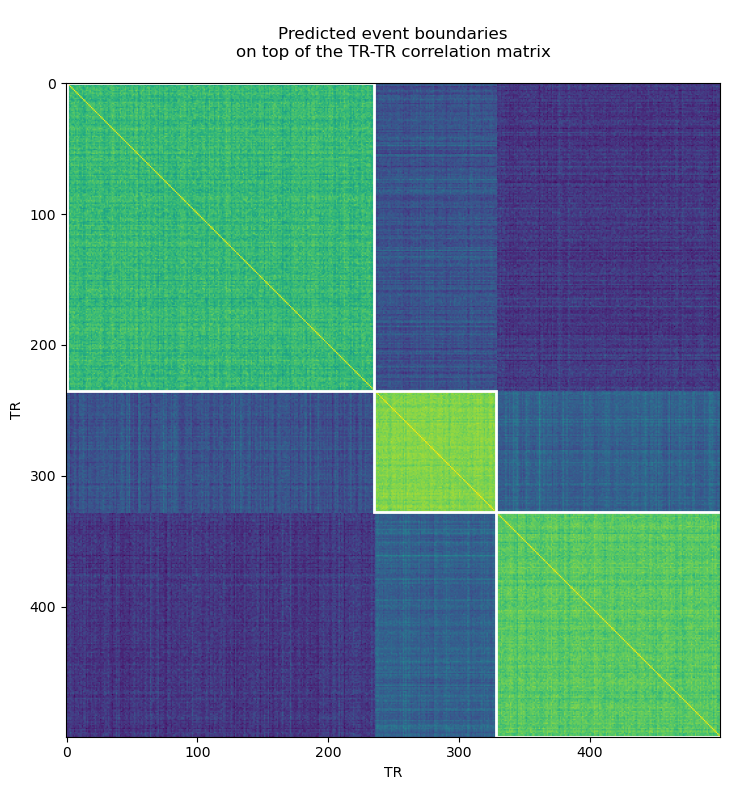

In [189]:
# extract the boundaries 
bounds = np.where(np.diff(np.argmax(pred_seg, axis=1)))[0]

f, ax = plt.subplots(1,1, figsize = (10,8))
title_text = '''
Predicted event boundaries
on top of the TR-TR correlation matrix
'''
plot_tt_similarity_matrix(ax, D, bounds, T, title_text)
f.tight_layout()

f.savefig('hmmoverlay.png', dpi=300)

## Plotting regions on cortical surface

See my repo [here](https://github.com/w-decker/cortical-plotting) for a function that does this easily.

This is using `nilearn.plotting.plot_surf_roi()`

Get some things form Nilearn

In [70]:
# load in atlas
atlas = datasets.fetch_atlas_surf_destrieux()

# parcellation
parcel = atlas['map_left']

# get ROI and create mask
roi = 34 # change as needed
mask = (parcel == roi)
roi_name = 'stg'

# fsaverage
fsaverage = datasets.fetch_surf_fsaverage()
fscat = 'pial_left'


Plot

This doesn't show inline for some reason. 

In [75]:
x = plot_surf_roi(fsaverage[fscat], roi_map=mask,
                        hemi='left', view='lateral',
                        bg_map=fsaverage['sulc_left'], bg_on_data=True,
                        darkness=.5, cmap='black_purple_r',
                        output_file=f'{roi_name}' + '.png')

show()